In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day12.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/ryct.2020200034.fig5-day4.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/ryct.2020200034.fig5-day0.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g09a-Fig9a-day17.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/ryct.2020200034.fig2.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/streptococcus-pneumoniae-pneumonia-temporal-evolution-1-day3.jpg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PN

In [2]:
import os 
import PIL
import PIL.Image
import tensorflow as tf


../input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19
../input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19

In [3]:
import pathlib
Xray_dir="../input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19"
Xray_dir=pathlib.Path(Xray_dir)

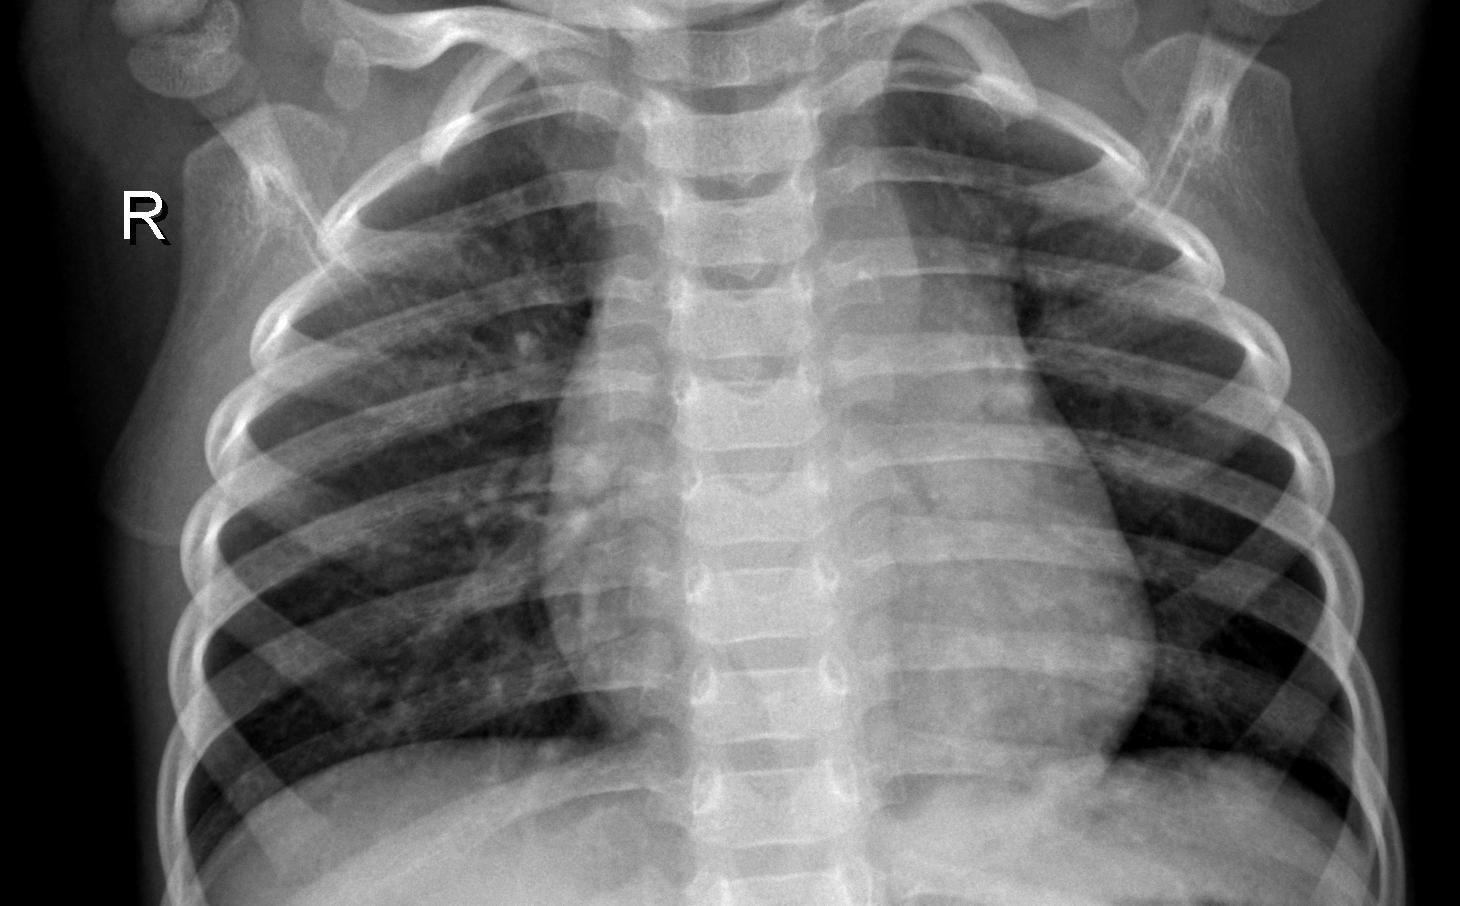

In [4]:
normal_train=list(Xray_dir.glob('train/NORMAL/*'))
PIL.Image.open(str(normal_train[0]))

In [5]:
len(normal_train)

74

In [6]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
batchsize=34
imgsize=(160,160)
Train_dir=os.path.join('../input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19','train')
Test_dir=os.path.join('../input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19','test')
Train_Xrays=image_dataset_from_directory(Train_dir,shuffle=True,batch_size=batchsize,image_size=imgsize)
Test_Xrays=image_dataset_from_directory(Test_dir,shuffle=True,batch_size=batchsize,image_size=imgsize)


Found 148 files belonging to 2 classes.
Found 40 files belonging to 2 classes.


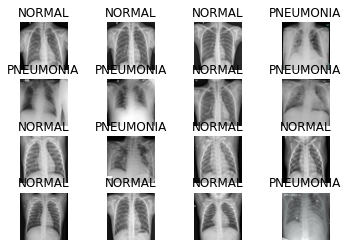

In [7]:
import matplotlib.pyplot as plt
class_name=Train_Xrays.class_names
for images,labels in Train_Xrays.take(1):
    for i in range(16):
        pl=plt.subplot(4,4,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_name[labels[i]])
        plt.axis("off")
        

 

In [8]:
val_fraction=tf.data.experimental.cardinality(Test_Xrays)
Test_Xrays_final=Test_Xrays.take(val_fraction // 50)
Validation_Xrays=Test_Xrays.skip(val_fraction // 50)

In [9]:
AUTOTUNE=tf.data.AUTOTUNE
Train_Xrays=Train_Xrays.prefetch(buffer_size=AUTOTUNE)
Validation_Xrays=Validation_Xrays.prefetch(buffer_size=AUTOTUNE)
Test_Xrays_final=Test_Xrays_final.prefetch(buffer_size=AUTOTUNE)

In [10]:
from tensorflow.keras import layers 
data_aug=tf.keras.Sequential([layers.experimental.preprocessing.RandomFlip('horizontal'),layers.experimental.preprocessing.RandomRotation(0.2)])

In [11]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

In [12]:
train_dataset=Train_Xrays
validation_dataset=Validation_Xrays
test_dataset=Test_Xrays_final

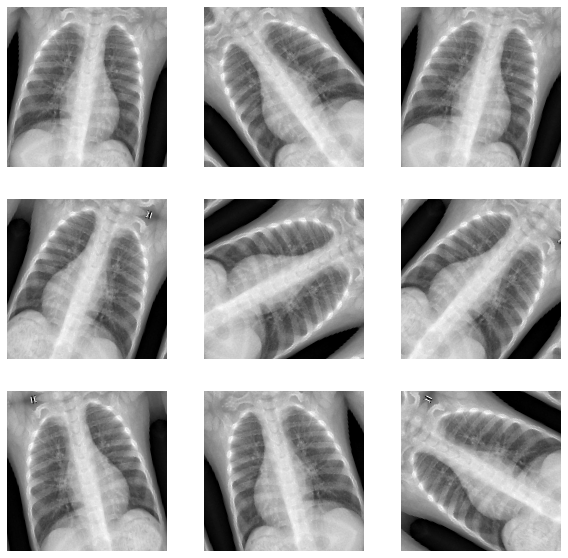

In [13]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [14]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [15]:
rescale = tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)

In [16]:
IMG_SIZE=(160,160)
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9412608/9406464 [==============================] - 0s 0us/step


In [17]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(34, 5, 5, 1280)


In [18]:

base_model.trainable = False
# Let's take a look at the base model architecture
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 80, 80, 32)   0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [19]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(34, 1280)


In [20]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(34, 1)


In [21]:
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [22]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 160, 160, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0     

In [24]:
len(model.trainable_variables)

2

In [25]:
initial_epochs = 10
loss0, accuracy0 = model.evaluate(validation_dataset)

2/2 [==============================] - 2s 99ms/step - loss: 0.6328 - accuracy: 0.7088


In [26]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 0.62
initial accuracy: 0.73


In [27]:
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/10
5/5 [==============================] - 6s 232ms/step - loss: 0.6872 - accuracy: 0.6081 - val_loss: 0.6018 - val_accuracy: 0.7250
Epoch 2/10
5/5 [==============================] - 3s 143ms/step - loss: 0.6390 - accuracy: 0.6419 - val_loss: 0.5888 - val_accuracy: 0.7500
Epoch 3/10
5/5 [==============================] - 3s 132ms/step - loss: 0.6421 - accuracy: 0.6689 - val_loss: 0.5768 - val_accuracy: 0.7500
Epoch 4/10
5/5 [==============================] - 3s 138ms/step - loss: 0.6748 - accuracy: 0.6284 - val_loss: 0.5665 - val_accuracy: 0.7250
Epoch 5/10
5/5 [==============================] - 3s 134ms/step - loss: 0.6110 - accuracy: 0.6554 - val_loss: 0.5561 - val_accuracy: 0.7250
Epoch 6/10
5/5 [==============================] - 3s 135ms/step - loss: 0.5503 - accuracy: 0.6892 - val_loss: 0.5459 - val_accuracy: 0.7250
Epoch 7/10
5/5 [==============================] - 3s 133ms/step - loss: 0.5673 - accuracy: 0.6757 - val_loss: 0.5352 - val_accuracy: 0.7250
Epoch 8/10
5/5 [====

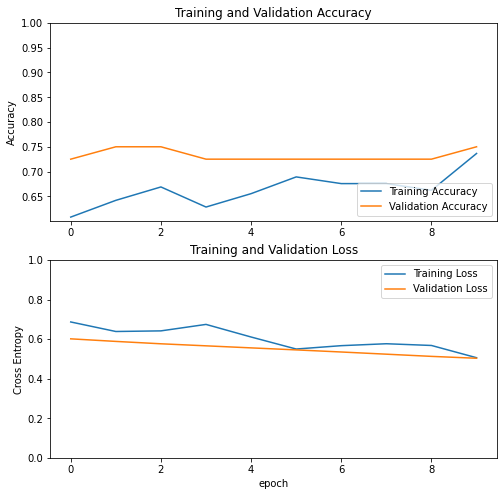

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [29]:
base_model.trainable = True

In [30]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(lr=base_learning_rate/10),
              metrics=['accuracy'])

In [31]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 160, 160, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0     

In [32]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs
history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

Epoch 10/20
5/5 [==============================] - 12s 429ms/step - loss: 0.5971 - accuracy: 0.6824 - val_loss: 0.2608 - val_accuracy: 0.9250
Epoch 11/20
5/5 [==============================] - 3s 248ms/step - loss: 0.3180 - accuracy: 0.8641 - val_loss: 0.2017 - val_accuracy: 0.9500
Epoch 12/20
5/5 [==============================] - 3s 209ms/step - loss: 0.2792 - accuracy: 0.8626 - val_loss: 0.1936 - val_accuracy: 0.8750
Epoch 13/20
5/5 [==============================] - 3s 208ms/step - loss: 0.1713 - accuracy: 0.9356 - val_loss: 0.1329 - val_accuracy: 0.9750
Epoch 14/20
5/5 [==============================] - 3s 214ms/step - loss: 0.1319 - accuracy: 0.9503 - val_loss: 0.1192 - val_accuracy: 0.9750
Epoch 15/20
5/5 [==============================] - 3s 209ms/step - loss: 0.0976 - accuracy: 0.9751 - val_loss: 0.2595 - val_accuracy: 0.9750
Epoch 16/20
5/5 [==============================] - 3s 212ms/step - loss: 0.1243 - accuracy: 0.9816 - val_loss: 0.3041 - val_accuracy: 0.9000
Epoch 17/20


In [33]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']
loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

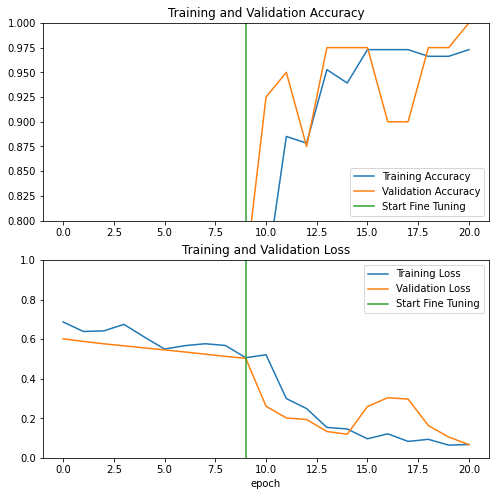

In [34]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()